In [1]:
# Re-imports after a restart
import sys, os, importlib
sys.path.append(os.path.abspath(".."))  # make ../src visible

import pandas as pd
import matplotlib.pyplot as plt

# Re-import project modules
from src import data as data_mod, features as features_mod, utils as utils_mod
importlib.reload(data_mod)
importlib.reload(features_mod)
importlib.reload(utils_mod)

from src.data import get_data
from src.features import add_features
from src.utils import make_labels


In [2]:
df = get_data("AAPL", start="2015-01-01", end="2023-12-31")
print("Raw data shape:", df.shape)
print(df.columns.tolist())
df.head()


Raw data shape: (2264, 6)
['date', 'open', 'high', 'low', 'close', 'volume']


,date,open,high,low,close,volume
0,2015-01-02,24.718180,24.729276,23.821677,24.261053,212818400
1,2015-01-05,24.030269,24.110156,23.391179,23.577579,257142000
2,2015-01-06,23.641916,23.839413,23.218074,23.579782,263188400
3,2015-01-07,23.788385,24.010292,23.677432,23.910435,160423600
4,2015-01-08,24.238854,24.886821,24.121242,24.829124,237458000


In [3]:
df = add_features(df)
print("With features shape:", df.shape)
df.head()


With features shape: (2231, 14)


,date,open,high,low,close,volume,ret1,ret5,ret10,vol10,volz,rsi14,macd,macd_signal
0,2015-02-20,28.654266,28.850315,28.527281,28.850315,195793600,0.008174,0.024039,0.079706,0.009271,-0.593114,78.737178,1.055489,0.908930
1,2015-02-23,28.966157,29.630047,28.885955,29.630047,283896400,0.027027,0.046585,0.118305,0.009183,0.227530,82.379132,1.123914,0.951927
2,2015-02-24,29.616686,29.763723,29.222360,29.445143,276912400,-0.006240,0.033951,0.103992,0.010687,0.131432,78.926713,1.149965,0.991534
3,2015-02-25,29.309247,29.318160,28.549558,28.692139,298846800,-0.025573,0.000544,0.055483,0.014934,0.406392,66.672425,1.097201,1.012668
4,2015-02-26,28.692141,29.155528,28.206477,29.055277,365150000,0.012656,0.015337,0.044363,0.013846,1.801402,69.159266,1.072327,1.024600


In [4]:
df = make_labels(df, tau=0.0)
print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (2230, 16)


,date,open,high,low,close,volume,ret1,ret5,ret10,vol10,volz,rsi14,macd,macd_signal,ret_next,y
0,2015-02-20,28.654266,28.850315,28.527281,28.850315,195793600,0.008174,0.024039,0.079706,0.009271,-0.593114,78.737178,1.055489,0.908930,0.027027,1
1,2015-02-23,28.966157,29.630047,28.885955,29.630047,283896400,0.027027,0.046585,0.118305,0.009183,0.227530,82.379132,1.123914,0.951927,-0.006240,0
2,2015-02-24,29.616686,29.763723,29.222360,29.445143,276912400,-0.006240,0.033951,0.103992,0.010687,0.131432,78.926713,1.149965,0.991534,-0.025573,0
3,2015-02-25,29.309247,29.318160,28.549558,28.692139,298846800,-0.025573,0.000544,0.055483,0.014934,0.406392,66.672425,1.097201,1.012668,0.012656,1
4,2015-02-26,28.692141,29.155528,28.206477,29.055277,365150000,0.012656,0.015337,0.044363,0.013846,1.801402,69.159266,1.072327,1.024600,-0.015028,0


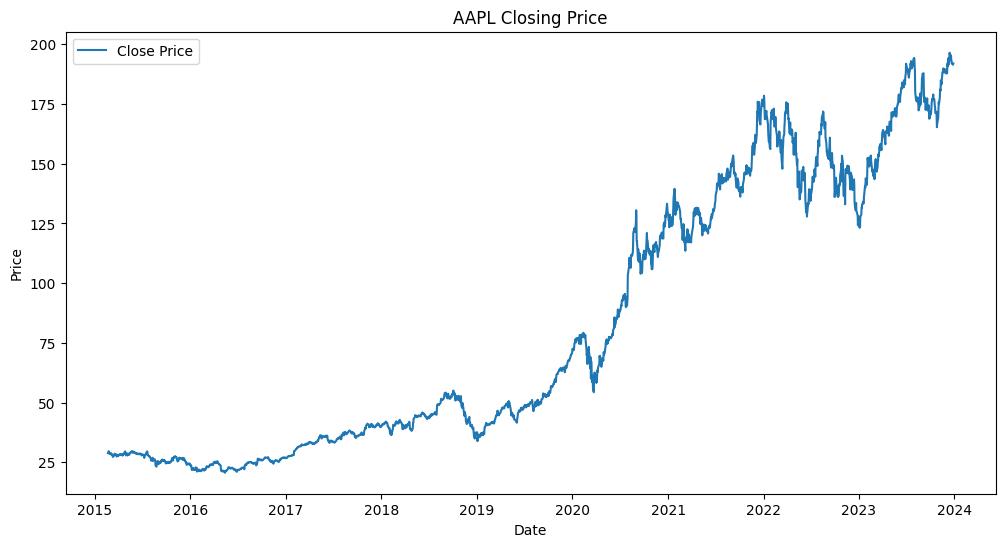

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close"], label="Close Price")
plt.title("AAPL Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [6]:
print("Label distribution (0=down, 1=up):")
df["y"].value_counts(normalize=True)


Label distribution (0=down, 1=up):


y
1    0.526009
0    0.473991
Name: proportion, dtype: float64